## Re-slicing
This example shows the use of the function ``reslice_image``. We assume you have produced an isolation mask and a deformation file (``y_suitdef.nii``) using the Matlab version of the toolbox as described in the last step. 

In [1]:
# Import necessary packages
from nilearn import plotting
import SUITPy.reslice as reslice
import nibabel as nib

/opt/miniconda3/lib/python3.9/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


### Reslice image without mask
The reslice function takes at he mininum 2 input parameters: The list of source images (the images that you want to reslice) and the deformation map.

In [2]:
output_img = reslice.reslice_image(source_image = 'anatomical_sess-01.nii',
                                    deformation = 'y_suitdef.nii')

/opt/miniconda3/lib/python3.9/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


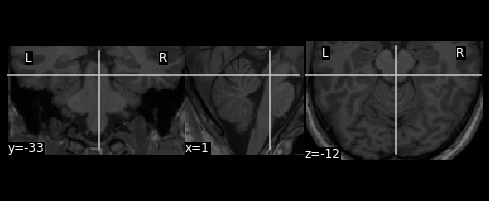

In [3]:
plotting.plot_anat(output_img)

In [4]:
# Of course you can also save the image as an nifti file
# nib.save(output_img, "img1.nii")

### Reslice image with mask 
For cerebellar data analysis, it is good practice to mask the functional images to only retain the cerebellum before any smoothing occurrs. This prevents un-wanted spill-over of neocortical signal into the cerebellum. As a cerebellar mask you can use the mask produced in the [https://www.diedrichsenlab.org/imaging/suit_function.htm#suit_isolate_seg] of the matlab toolbox. 

In [5]:
output_img = reslice.reslice_image(source_image = 'anatomical_sess-01.nii',
                                    deformation = 'y_suitdef.nii',
                                    mask = 'c_anatomical_sess-01_pcereb.nii')

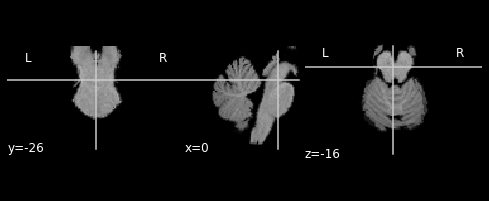

In [6]:
plotting.plot_anat(output_img)

### Specific voxel size
By default, the new image will be resliced into the same resolution and bouding box as the deformation map (y_xxx.nii). For functional data we often would like a different resolution. For this, you can simply specify the voxel size. 

In [7]:
output_img = reslice.reslice_image(source_image = 'anatomical_sess-01.nii',
                                    deformation = 'y_suitdef.nii',
                                    mask = 'c_anatomical_sess-01_pcereb.nii',
                                    voxelsize = (2,3,2))

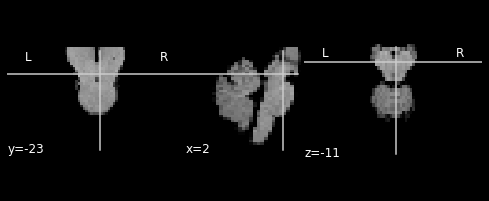

In [8]:
plotting.plot_anat(output_img)

In [9]:
# Voxel size has been changed.
output_img.shape

(71, 32, 44)

### Specify output dimensions and affine transformation
To fully specify the output dimensions of the data, you can also specify a affine transformation and a image dimensions 

In [9]:
output_img = reslice.reslice_image(source_image = "anatomical_sess-01.nii",
                                    deformation = "y_suitdef.nii",
                                    mask = "c_anatomical_sess-01_pcereb.nii",
                                    imagedim = [100,50,30],
                                    affine = output_img.affine)

(100, 50, 30)

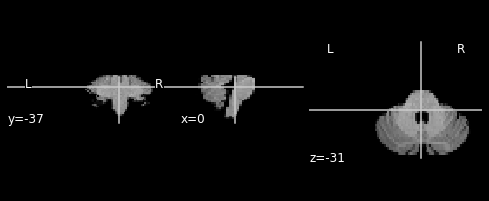

In [10]:
plotting.plot_anat(output_img)
output_img.shape